In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
companies = pd.read_csv ('companies.csv')

In [ ]:
df = pd.DataFrame (companies)

In [ ]:
df.isna ().sum ()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

/var/folders/8f/9lp__8v92vsfg8szvm_cz1tc0000gn/T/ipykernel_37834/3242749615.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap (df.corr ())


<Axes: >

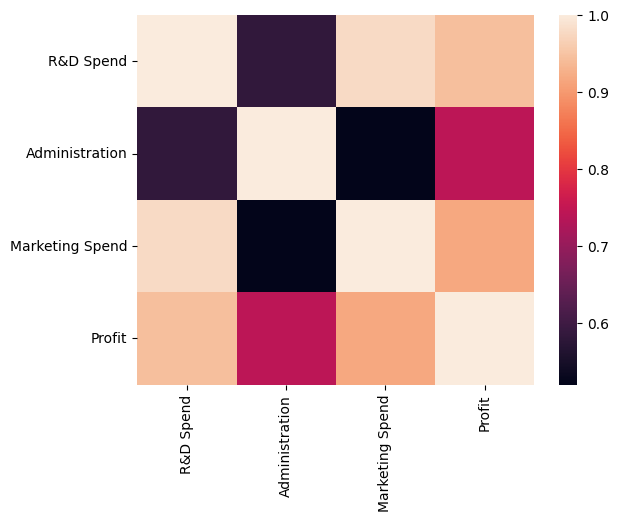

In [ ]:
sb.heatmap (df.corr ())

In [ ]:
labenc =  LabelEncoder ()
df['State'] = labenc.fit_transform (df['State'])

In [ ]:
df['State'].unique ()

array([2, 0, 1])

In [ ]:
stdscale = StandardScaler ()

In [ ]:
Xp = df.iloc[:, :-1].values
yp = df.iloc[:, 4].values

In [ ]:
X = pd.DataFrame (df['Marketing Spend'])
y = pd.DataFrame (df['Profit'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state=1)

In [ ]:
X_train = stdscale.fit_transform (X_train)
X_test = stdscale.transform (X_test)

In [ ]:
model = LinearRegression ()

In [ ]:
model.fit (X_train, y_train)

LinearRegression()

In [ ]:
model.intercept_, model.coef_

(array([121505.37396903]), array([[38984.90355509]]))

In [ ]:
model.coef_ * (X_train[0]) + model.intercept_

array([[67697.73458054]])

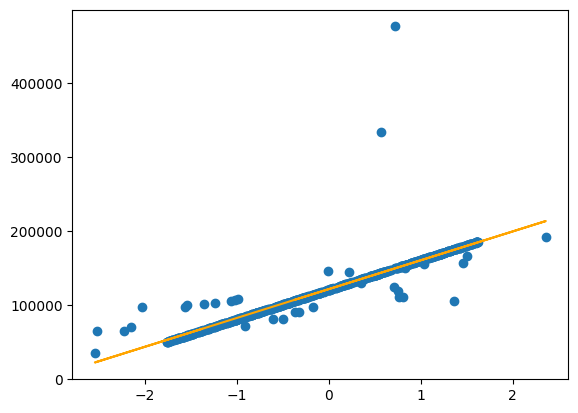

In [ ]:
y_pred = model.predict (X_train)
plt.scatter (X_train, y_train)
plt.plot (X_train, y_pred, color='orange')

In [ ]:
f'Regression Eq: y = {model.coef_[0][0].round (3)} * X + {model.intercept_[0].round (3)}'

NameError: name 'model' is not defined

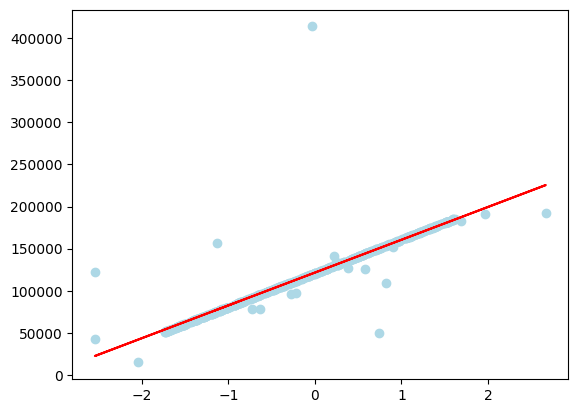

In [ ]:
y_pred = model.predict (X_test)
plt.scatter (X_test, y_test, color='lightblue')
plt.plot (X_test, y_pred, color='red')

In [ ]:
from sklearn.metrics import r2_score
r2_score (y_test, y_pred)

0.8400117648432268